In [1690]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder, Normalizer, MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import SelectKBest, RFE, f_classif
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve

from sklearn.pipeline import Pipeline


In [1608]:
df = pd.read_csv('./Data/data_regression.csv')
display(df.head(), df.shape)

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2015       100198  409-8743  Female   36                     62   
1  2015       100643  340-5930  Female   39                    149   
2  2015       100756  372-3750  Female   65                    126   
3  2015       101595  331-4902  Female   24                    131   
4  2015       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls  churn  
0                    4.0                       1    0.0  
1                    3.0                       2    0.0  
2                    4.0                       5    1.0  
3                    3.0                       3    0.0  
4                    3.0                       1    0.0

(2000, 16)

In [1609]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [1610]:
df['year'].value_counts()

2015    2000
Name: year, dtype: int64

In [1611]:
# we will drop year, customer_id and phone_no, year only has one value, customer_id and phone_no are unique values
df.drop(['year', 'customer_id', 'phone_no'], axis=1, inplace=True)

### EDA

In [1612]:
df.describe()

age  no_of_days_subscribed  weekly_mins_watched  \
count  2000.00000            2000.000000          2000.000000   
mean     38.69050              99.750000           270.178425   
std      10.20641              39.755386            80.551627   
min      18.00000               1.000000             0.000000   
25%      32.00000              73.000000           218.212500   
50%      37.00000              99.000000           269.925000   
75%      44.00000             127.000000           324.675000   
max      82.00000             243.000000           526.200000   

       minimum_daily_mins  maximum_daily_mins  weekly_max_night_mins  \
count         2000.000000         2000.000000            2000.000000   
mean            10.198700           30.620780             100.415500   
std              2.785519            9.129165              19.529454   
min              0.000000            0.000000              42.000000   
25%              8.400000           24.735000              87.000000   
50%             10.200000           30.590000             101.000000   
75%             12.000000           36.797500             114.000000   
max             20.000000           59.640000             175.000000   

       videos_watched  maximum_days_inactive  customer_support_calls  \
count     2000.000000            1972.000000             2000.000000   
mean         4.482500               3.250507                1.547000   
std          2.487728               0.809084                1.315164   
min          0.000000               0.000000                0.000000   
25%          3.000000               3.000000                1.000000   
50%          4.000000               3.000000                1.000000   
75%          6.000000               4.000000                2.000000   
max         19.000000               6.000000                9.000000   

             churn  
count  1965.000000  
mean      0.133333  
std       0.340021  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [1613]:
df.gender.dtypes

dtype('O')

### Detect and Handle Missing Values

In [1614]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [1615]:
for i in df.columns:
    n_miss = df[[i]].isnull().sum()
    if n_miss.values[0] > 0:
      perc = n_miss / df.shape[0] * 100
      print('> %s' % (i), n_miss.values[0], '(%s%%)' % round(perc.values[0], 2))

> gender 24 (1.2%)
> maximum_days_inactive 28 (1.4%)
> churn 35 (1.75%)


In [1616]:
df_drop_missing = df.dropna()
df_drop_missing.isna().sum().sum()

0

In [1617]:
df = df.dropna(subset='churn')

In [1618]:
df['gender'].value_counts()

Male      1032
Female     909
Name: gender, dtype: int64

In [1619]:
def impute(df):
  print('Missing values before imputation:', df.isna().sum().sum())
  df_filled = df.copy()
  for col in df.columns:
      if df[col].dtype == 'object':
          imputer = SimpleImputer(strategy='most_frequent')
          df_filled[col] = imputer.fit_transform(df[[col]])
      else:
          imputer = SimpleImputer(strategy='median')
          df_filled[col] = imputer.fit_transform(df[[col]])

  print('Missing values after imputation:', df.isna().sum().sum())

  return df_filled

In [1620]:
df_filled = impute(df)

Missing values before imputation: 50
Missing values after imputation: 50


In [1621]:
label_encoder = LabelEncoder()
df_filled['gender'] = label_encoder.fit_transform(df_filled['gender'])
df_filled['multi_screen'] = label_encoder.fit_transform(df_filled['multi_screen'])
df_filled['mail_subscribed'] = label_encoder.fit_transform(df_filled['mail_subscribed'])

In [1622]:
df_filled['churn'] = df_filled['churn'].astype(int)
df_filled.head()

gender   age  no_of_days_subscribed  multi_screen  mail_subscribed  \
0       0  36.0                   62.0             0                0   
1       0  39.0                  149.0             0                0   
2       0  65.0                  126.0             0                0   
3       0  24.0                  131.0             0                1   
4       0  40.0                  191.0             0                0   

   weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0               148.35                12.2               16.81   
1               294.45                 7.7               33.37   
2                87.30                11.9                9.89   
3               321.30                 9.5               36.41   
4               243.00                10.9               27.54   

   weekly_max_night_mins  videos_watched  maximum_days_inactive  \
0                   82.0             1.0                    4.0   
1                   87.0             3.0                    3.0   
2                   91.0             1.0                    4.0   
3                  102.0             4.0                    3.0   
4                   83.0             7.0                    3.0   

   customer_support_calls  churn  
0                     1.0      0  
1                     2.0      0  
2                     5.0      1  
3                     3.0      0  
4                     1.0      0

<b>Observation:</b>
- We can drop the the year column since it is the same for all the rows.

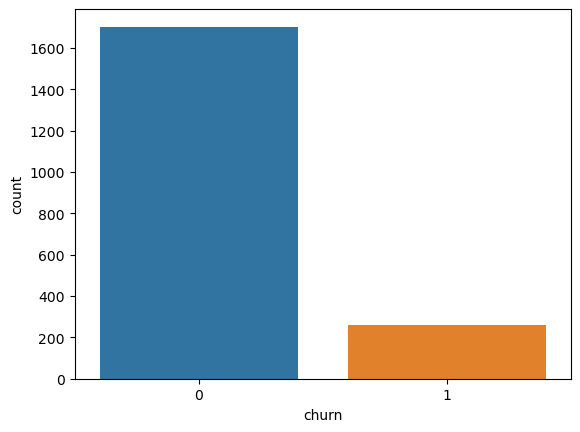

In [1623]:
sns.countplot(x='churn', data=df_filled)
plt.show()


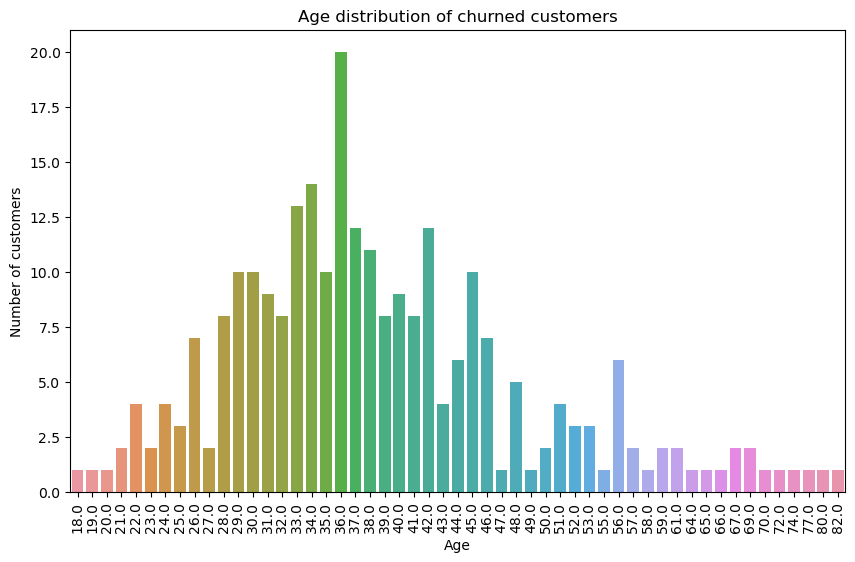

In [1624]:
age_churned = df_filled[df_filled['churn'] == 1]['age'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_churned.index, y=age_churned.values)
plt.title('Age distribution of churned customers')
plt.ylabel('Number of customers')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.show()

In [1625]:
df_filled['maximum_days_inactive'].value_counts()

3.0    957
4.0    634
2.0    269
5.0     82
1.0     12
0.0      9
6.0      2
Name: maximum_days_inactive, dtype: int64

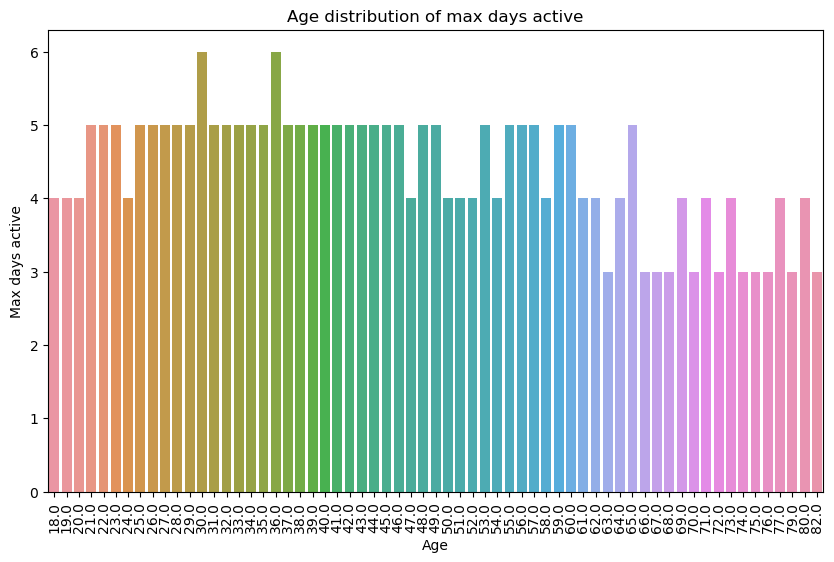

In [1626]:
age_max_days_active = df_filled.groupby('age')['maximum_days_inactive'].max()

plt.figure(figsize=(10, 6))
sns.barplot(x=age_max_days_active.index, y=age_max_days_active.values)
plt.title('Age distribution of max days active')
plt.ylabel('Max days active')
plt.xticks(rotation=90)
plt.xlabel('Age')
plt.show()

In [1627]:
def grouping(feat1, feat2):
    grouped = df_filled.groupby(feat1)[feat2].max()

    plt.figure(figsize=(10, 6))
    sns.barplot(x=grouped.index, y=grouped.values)
    plt.title(feat1 + ' distribution of ' + feat2)
    plt.ylabel(feat2)
    plt.xticks(rotation=90)
    plt.xlabel(feat1)
    plt.show()

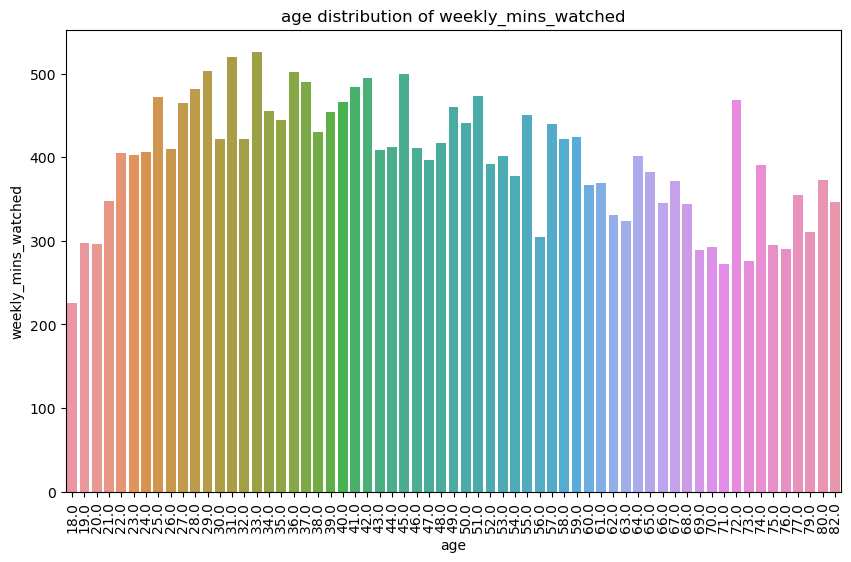

In [1628]:
grouping('age', 'weekly_mins_watched')

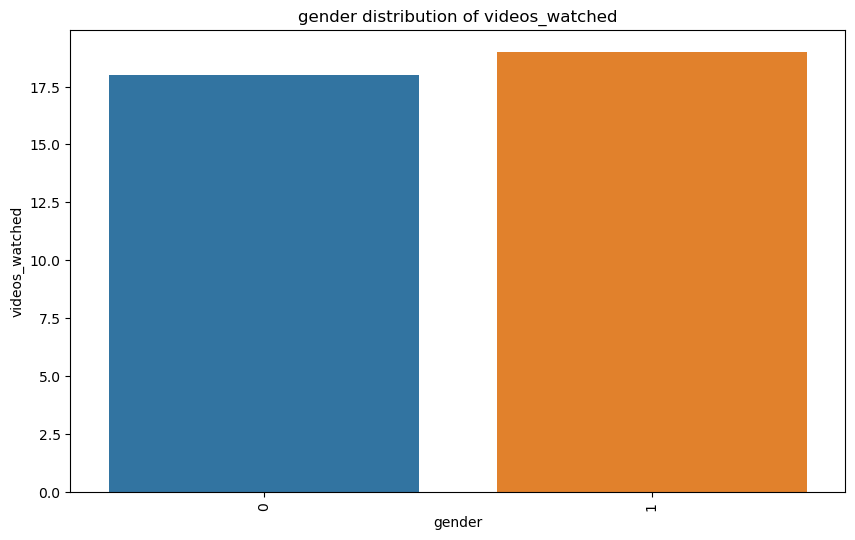

In [1629]:
grouping('gender', 'videos_watched')

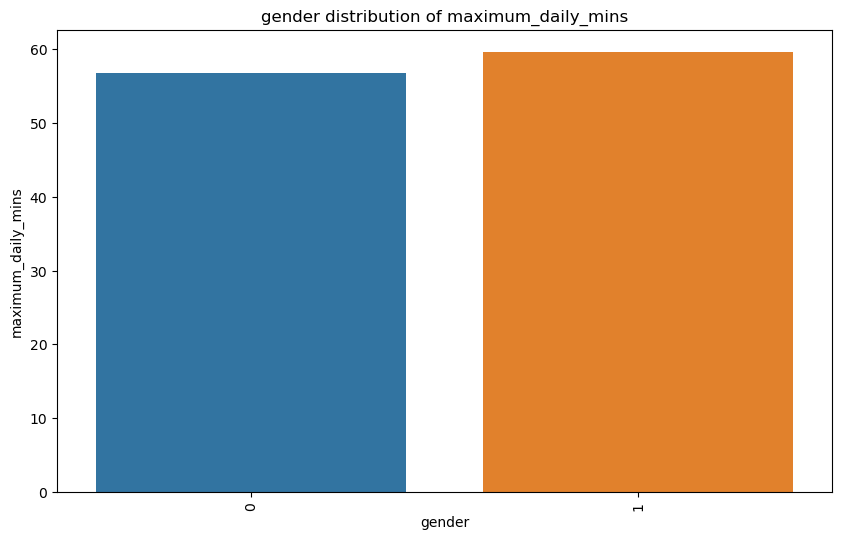

In [1630]:
grouping('gender', 'maximum_daily_mins')

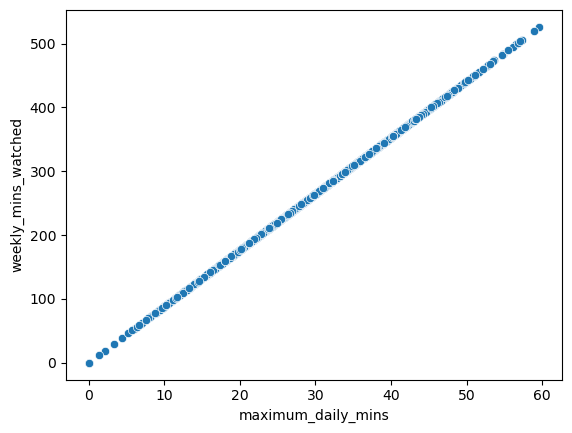

In [1631]:
sns.scatterplot(x='maximum_daily_mins', y='weekly_mins_watched', data=df)
plt.show()

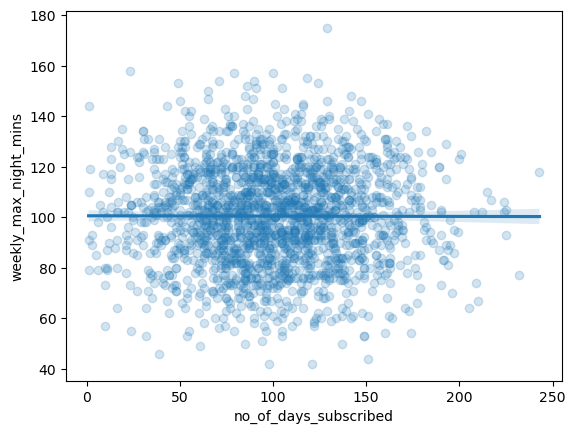

In [1632]:
sns.regplot(x='no_of_days_subscribed', y='weekly_max_night_mins', data=df, scatter_kws={'alpha':0.2})
plt.show()

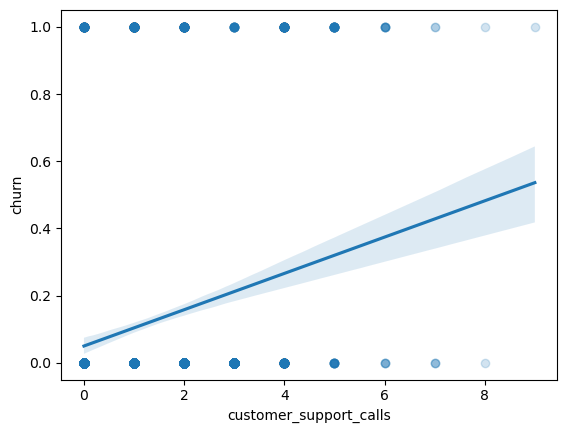

In [1633]:
# add a scatterplot with regression line
sns.regplot(x='customer_support_calls', y='churn', data=df, scatter_kws={'alpha':0.2})
plt.show()


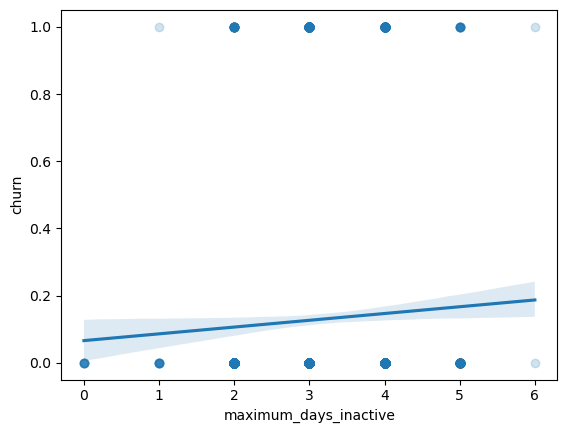

In [1634]:
sns.regplot(x='maximum_days_inactive', y='churn', data=df, scatter_kws={'alpha':0.2})
plt.show()

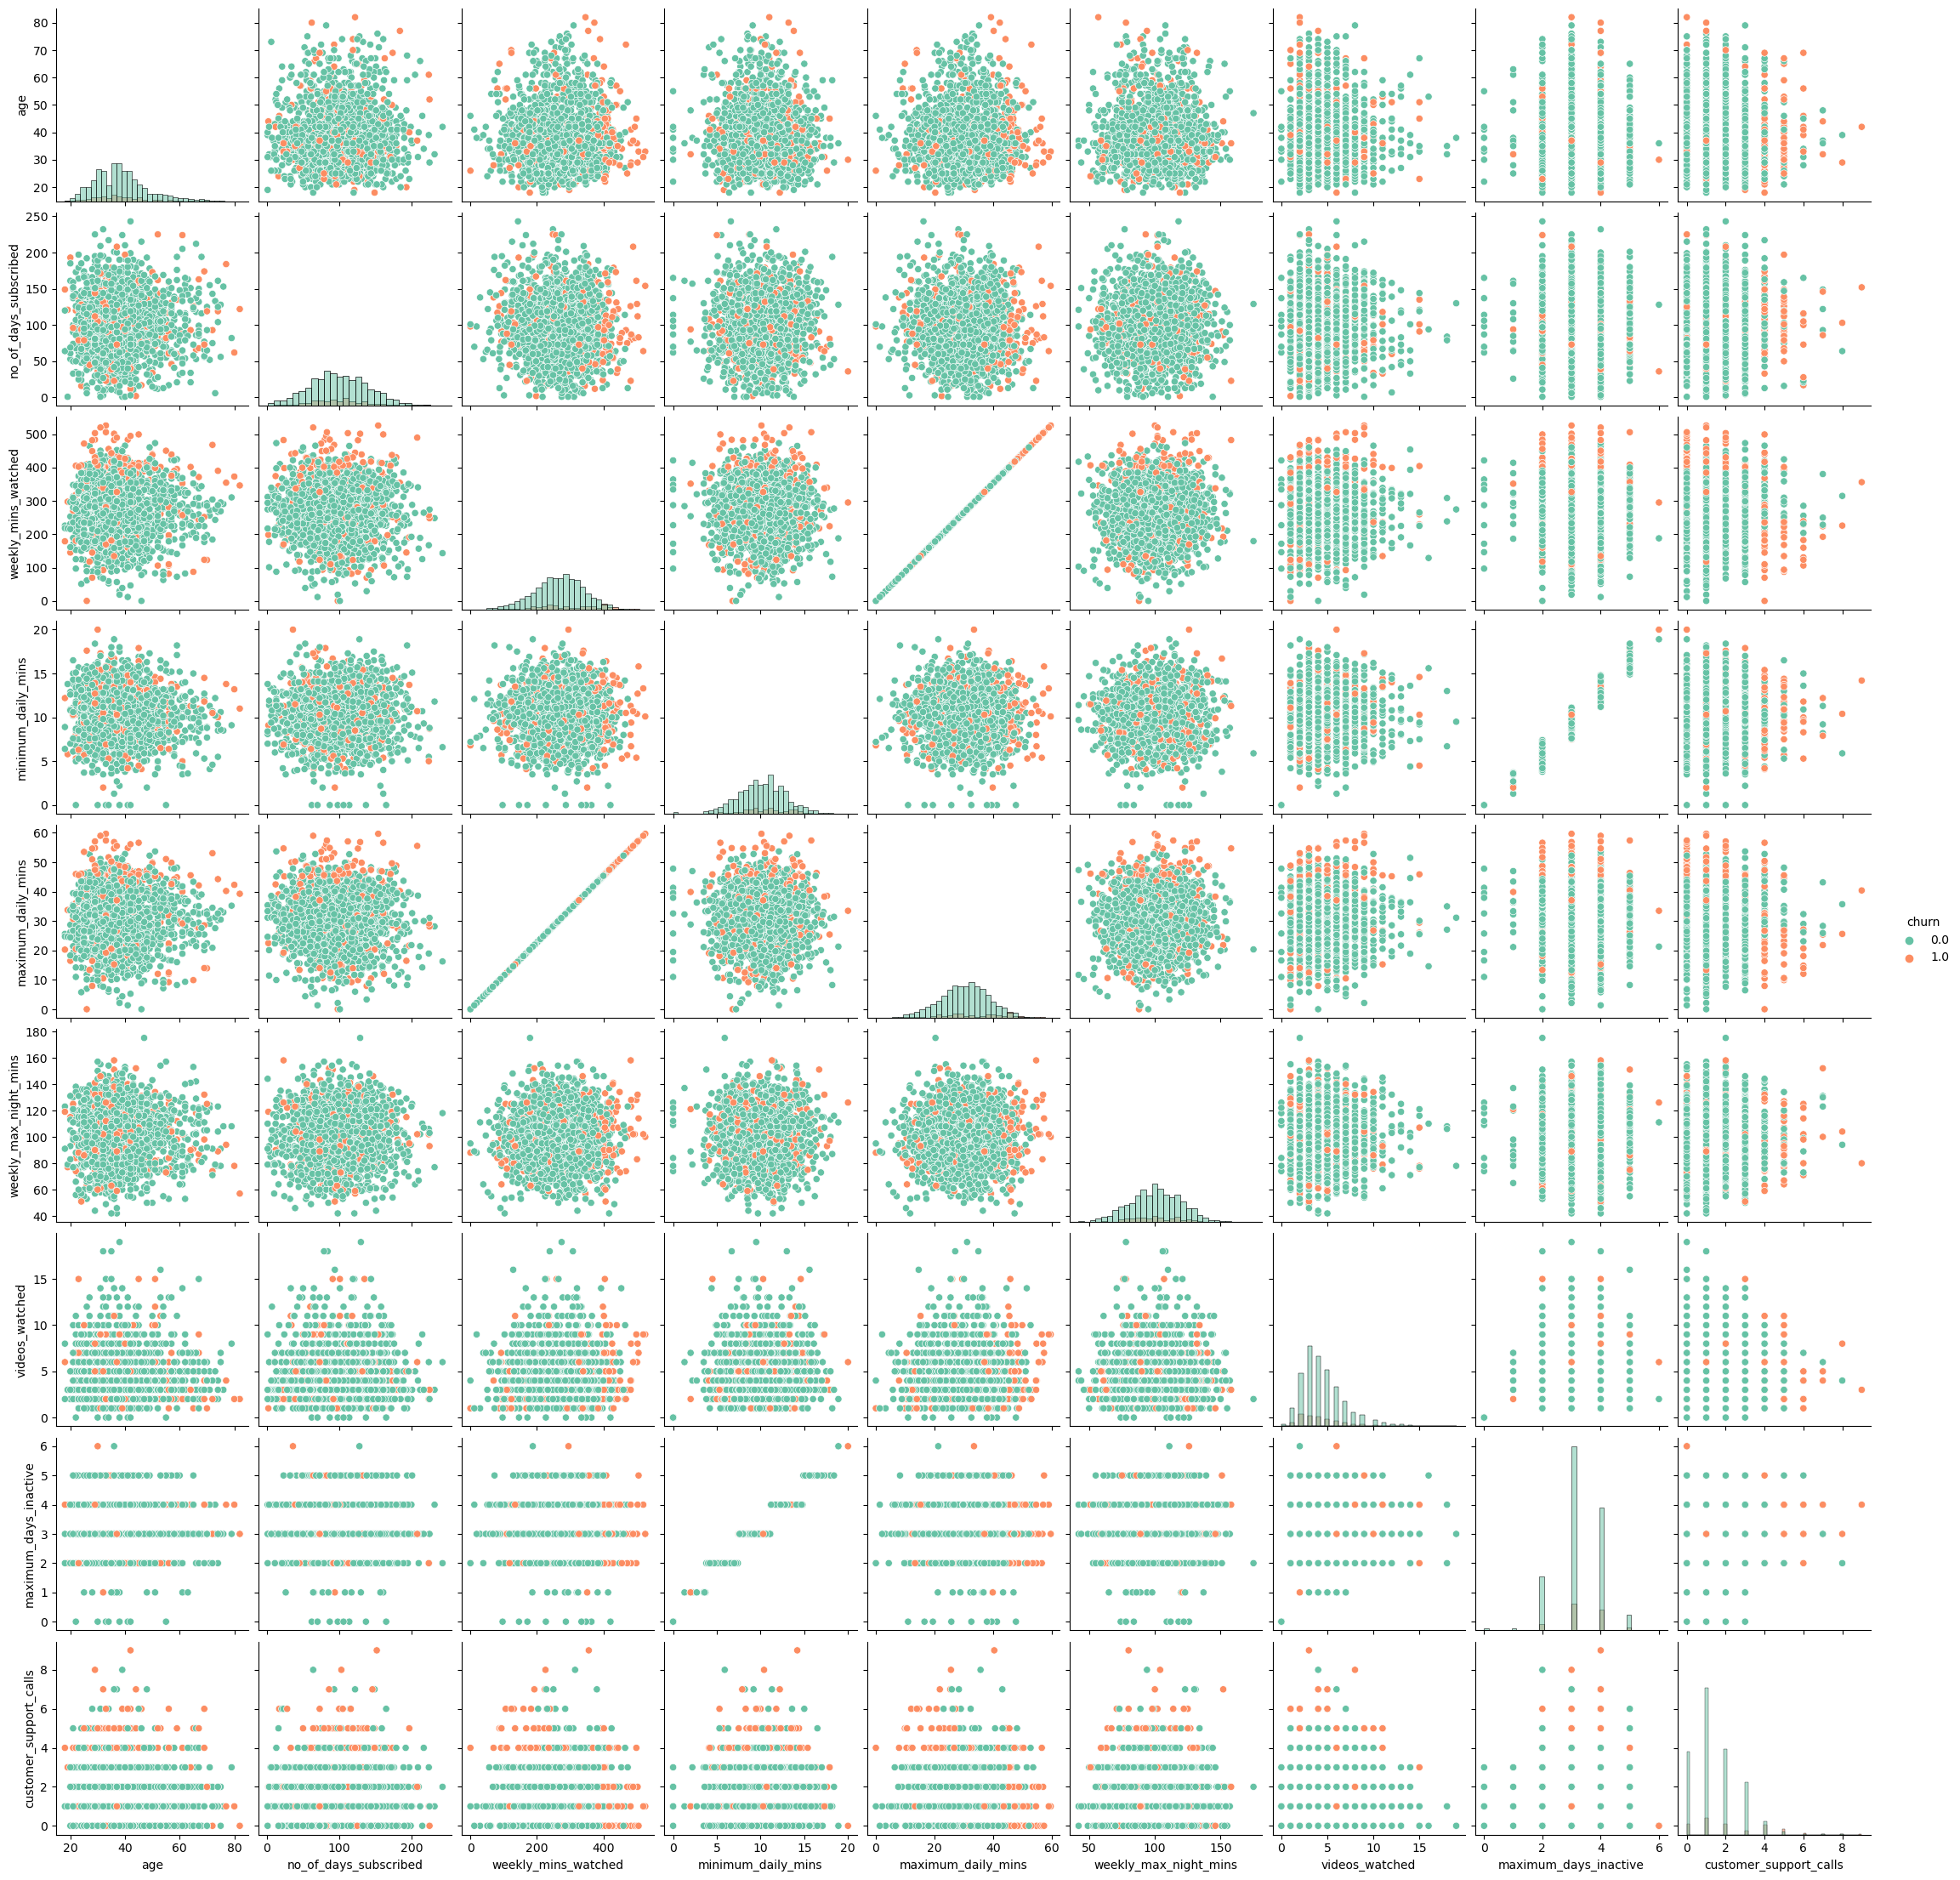

In [1635]:
sns.pairplot(df, hue='churn', diag_kind='hist', palette='Set2')
plt.show()

### Outlier Detection

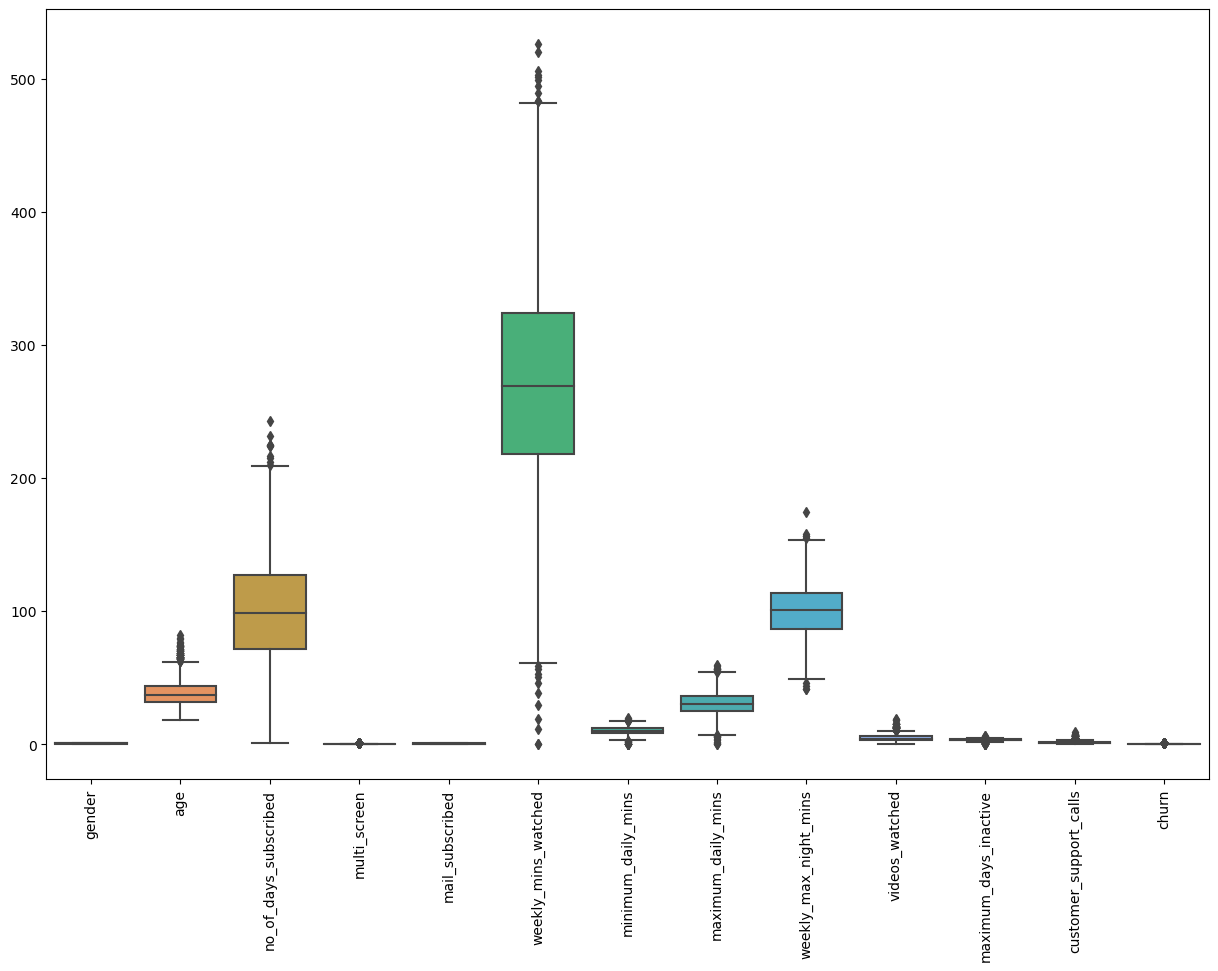

In [1636]:
plt.figure(figsize=(15, 10))
sns.boxplot(df_filled)
plt.xticks(rotation=90)
plt.show()

In [1637]:
def std_outlier_removal(data, column, threshold):
  data_mean = data[column].mean()
  data_std =  data[column].std()
  cut_off = data_std * threshold

  lower = data_mean - cut_off
  upper = data_mean + cut_off

  outliers = [x for x in data[column] if x < lower or x > upper]
  print('{}'.format(column))
  print('Identified outliers: %d' % len(outliers))
  outliers_removed = [x for x in data[column] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))

  print('\n')
  df_outliers_removed = data.loc[~data[column].isin(outliers)]
  return df_outliers_removed


In [1638]:
df_iqr = df_filled.copy()
df_outliers_rem = std_outlier_removal(df_iqr, 'age', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'no_of_days_subscribed', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'weekly_mins_watched', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'minimum_daily_mins', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'maximum_daily_mins', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'weekly_max_night_mins', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'videos_watched', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'maximum_days_inactive', 3)
df_outliers_rem = std_outlier_removal(df_outliers_rem, 'customer_support_calls', 3)

age
Identified outliers: 22
Non-outlier observations: 1943


no_of_days_subscribed
Identified outliers: 6
Non-outlier observations: 1937


weekly_mins_watched
Identified outliers: 6
Non-outlier observations: 1931


minimum_daily_mins
Identified outliers: 12
Non-outlier observations: 1919


maximum_daily_mins
Identified outliers: 1
Non-outlier observations: 1918


weekly_max_night_mins
Identified outliers: 1
Non-outlier observations: 1917


videos_watched
Identified outliers: 32
Non-outlier observations: 1885


maximum_days_inactive
Identified outliers: 0
Non-outlier observations: 1885


customer_support_calls
Identified outliers: 19
Non-outlier observations: 1866




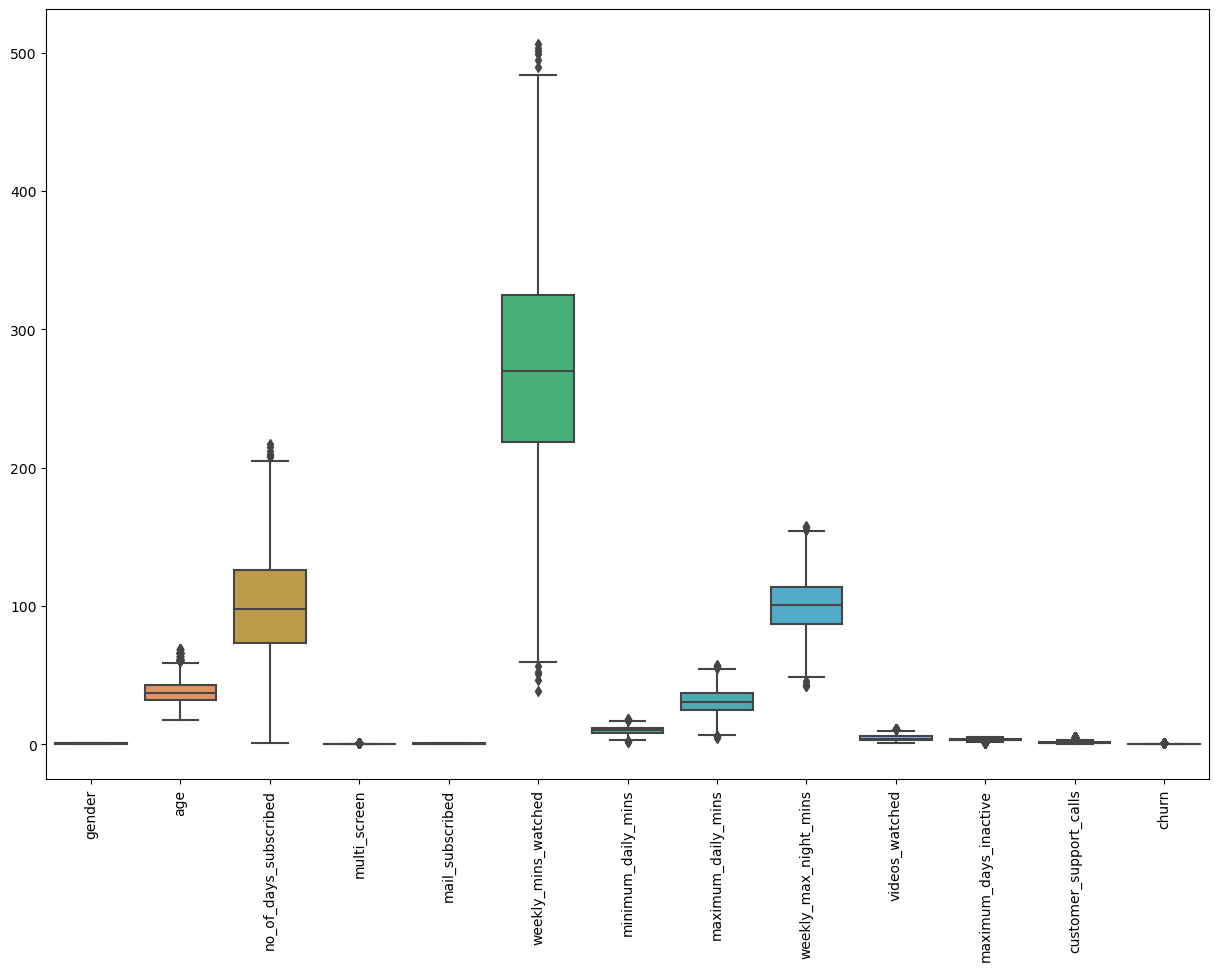

In [1639]:
plt.figure(figsize=(15, 10))
sns.boxplot(df_outliers_rem)
plt.xticks(rotation=90)
plt.show()

### Feature Selection

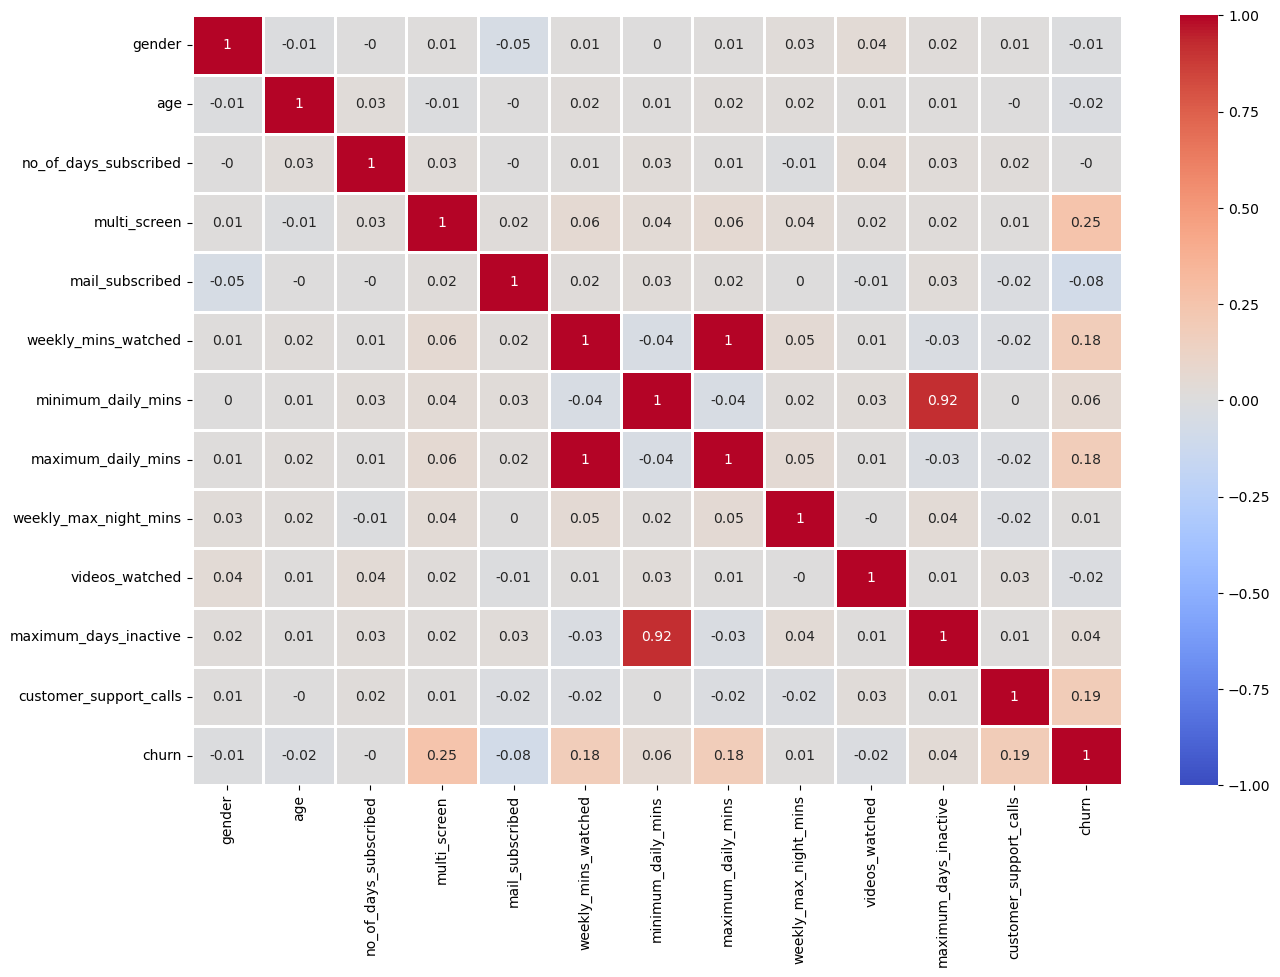

In [1640]:
## create a heatmap to check for correlation and round it to 2 decimal places
corr = df_outliers_rem.corr().round(2)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=2) 
plt.show()

In [1641]:
threshold = 0.7
corr = df_outliers_rem.corr().abs()

upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

to_drop = [column for column in upper.columns if column != 'churn' and any((upper[column] > threshold))]
to_drop = [column for column in to_drop if column is not None]
print(to_drop)

df_outliers_rem.drop(to_drop, axis=1, inplace=True)
df_outliers_rem.shape

['maximum_daily_mins', 'maximum_days_inactive']


(1866, 11)

### Handle Imbalanced Data

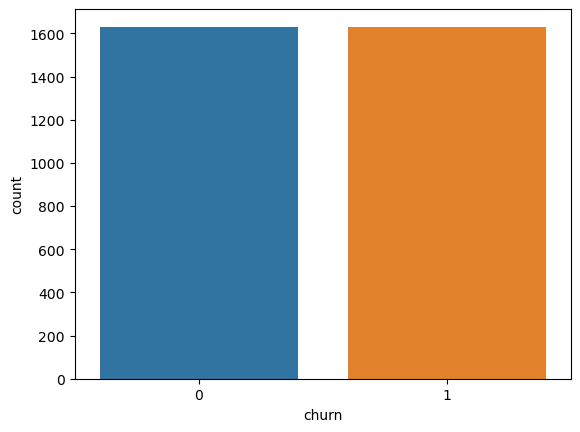

In [1642]:
from imblearn.over_sampling import SMOTE

X = df_outliers_rem.drop('churn', axis=1)
y = df_outliers_rem['churn']

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

sns.countplot(x=y)
plt.show()

In [1643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

### Featue Selection

#### SelectKBest

In [1644]:
def select_features(X_train, y_train, X_test, method, k):
    fs = SelectKBest(score_func=method, k=k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [1645]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, f_classif, 'all')

for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))

Feature 0: 181.742827
Feature 1: 6.400590
Feature 2: 0.015073
Feature 3: 30.001655
Feature 4: 235.593333
Feature 5: 173.098130
Feature 6: 37.590961
Feature 7: 0.027281
Feature 8: 1.194706
Feature 9: 198.163997


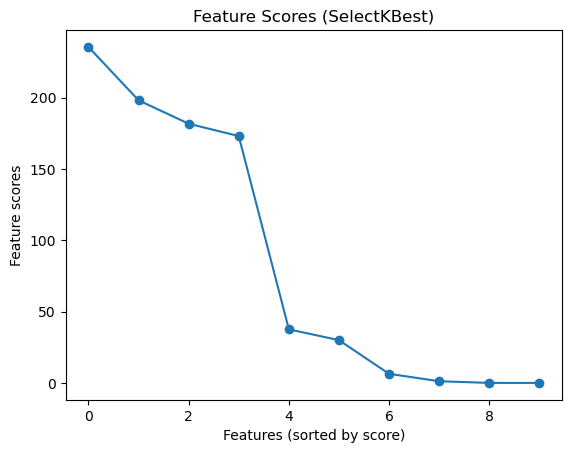

In [1646]:
# Sort the scores in descending order
sorted_scores = sorted(fs.scores_, reverse=True)

# Plot the sorted scores
plt.plot(sorted_scores, marker='o')
plt.xlabel('Features (sorted by score)')
plt.ylabel('Feature scores')
plt.title('Feature Scores (SelectKBest)')
plt.show()


<b>Observations:</b>

- We will choose the top 5 features based on the scores.

In [1647]:
skb = SelectKBest(score_func=f_classif, k=5)
feat = skb.fit(X_train, y_train)
print(feat.scores_)
featues = feat.transform(X_train)

print('Features selected: ', df_outliers_rem.drop('churn', axis=1).columns[feat.get_support()])

[1.81742827e+02 6.40059043e+00 1.50729110e-02 3.00016546e+01
 2.35593333e+02 1.73098130e+02 3.75909613e+01 2.72814702e-02
 1.19470592e+00 1.98163997e+02]
Features selected:  Index(['gender', 'mail_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'customer_support_calls'],
      dtype='object')


In [1648]:
df_skb = df_outliers_rem[df_outliers_rem.drop('churn', axis=1).columns[feat.get_support()].tolist()]
df_skb = pd.concat([df_skb, df_outliers_rem['churn']], axis=1)
df_skb.head()

gender  mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0       0                0               148.35                12.2   
1       0                0               294.45                 7.7   
2       0                0                87.30                11.9   
3       0                1               321.30                 9.5   
4       0                0               243.00                10.9   

   customer_support_calls  churn  
0                     1.0      0  
1                     2.0      0  
2                     5.0      1  
3                     3.0      0  
4                     1.0      0

#### RFE

In [1649]:
from sklearn.model_selection import KFold

def get_models():
    models = dict()
    for i in range(2, 12):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

def evaluate_model(model, X, y):
    cv = KFold(n_splits=10, shuffle=True, random_state=7)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

models = get_models()

results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train, y_train.astype('int'))
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

>2 0.846 (0.022)
>3 0.876 (0.021)
>4 0.879 (0.017)
>5 0.880 (0.017)
>6 0.884 (0.021)
>7 0.885 (0.014)
>8 0.885 (0.016)
>9 0.894 (0.020)
>10 0.893 (0.018)
>11 0.893 (0.018)


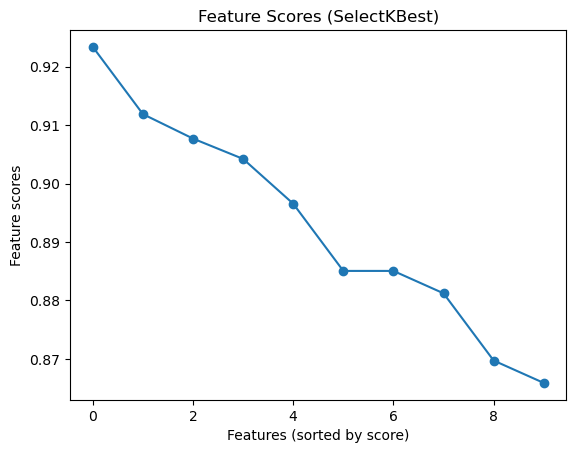

In [1650]:
# Sort the scores in descending order
sorted_scores = sorted(scores, reverse=True)

# Plot the sorted scores
plt.plot(sorted_scores, marker='o')
plt.xlabel('Features (sorted by score)')
plt.ylabel('Feature scores')
plt.title('Feature Scores (SelectKBest)')
plt.show()

In [1651]:
model = DecisionTreeClassifier()
rfe = RFE(estimator=model, n_features_to_select=9)
feat = rfe.fit(X_train, y_train.astype('int'))

print('Num features: ', feat.n_features_)
print('Feature ranking: ', feat.ranking_)
print('Selected features: ', df_outliers_rem.drop('churn', axis=1).columns[feat.support_])

Num features:  9
Feature ranking:  [2 1 1 1 1 1 1 1 1 1]
Selected features:  Index(['age', 'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'weekly_max_night_mins',
       'videos_watched', 'customer_support_calls'],
      dtype='object')


In [1652]:
df_rfe = df_outliers_rem[df_outliers_rem.drop('churn', axis=1).columns[feat.support_].tolist()]
df_rfe = pd.concat([df_rfe, df_outliers_rem['churn']], axis=1)
df_rfe.head()

age  no_of_days_subscribed  multi_screen  mail_subscribed  \
0  36.0                   62.0             0                0   
1  39.0                  149.0             0                0   
2  65.0                  126.0             0                0   
3  24.0                  131.0             0                1   
4  40.0                  191.0             0                0   

   weekly_mins_watched  minimum_daily_mins  weekly_max_night_mins  \
0               148.35                12.2                   82.0   
1               294.45                 7.7                   87.0   
2                87.30                11.9                   91.0   
3               321.30                 9.5                  102.0   
4               243.00                10.9                   83.0   

   videos_watched  customer_support_calls  churn  
0             1.0                     1.0      0  
1             3.0                     2.0      0  
2             1.0                     5.0      1  
3             4.0                     3.0      0  
4             7.0                     1.0      0

#### PCA

In [1653]:
pca = PCA(n_components=10)
feat = pca.fit(X_train)

print('Explained variance: ', feat.explained_variance_ratio_)
selected_feat_ind = np.abs(feat.components_).argmax(axis=1)
print('Selected features: ', df_outliers_rem.drop('churn', axis=1).columns[selected_feat_ind])

Explained variance:  [8.17839444e-01 1.38295377e-01 3.46815199e-02 7.91586414e-03
 6.33650996e-04 4.21924342e-04 1.64607075e-04 2.40247617e-05
 1.49287276e-05 8.65865212e-06]
Selected features:  Index(['weekly_mins_watched', 'no_of_days_subscribed', 'weekly_max_night_mins',
       'age', 'minimum_daily_mins', 'videos_watched', 'customer_support_calls',
       'gender', 'mail_subscribed', 'multi_screen'],
      dtype='object')


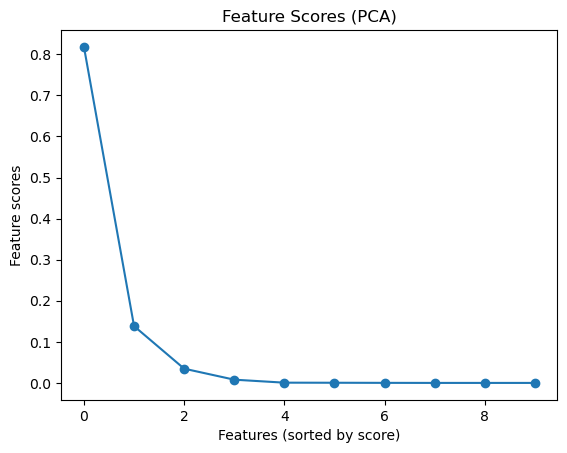

In [1654]:
# Sort the scores in descending order
sorted_scores = sorted(feat.explained_variance_ratio_, reverse=True)

# Plot the sorted scores
plt.plot(sorted_scores, marker='o')
plt.xlabel('Features (sorted by score)')
plt.ylabel('Feature scores')
plt.title('Feature Scores (PCA)')
plt.show()

In [1671]:
pca = PCA(n_components=3)
feat = pca.fit(X_train)

print('Explained variance: ', feat.explained_variance_ratio_)
selected_feat_ind = np.abs(feat.components_).argmax(axis=1)
print('Selected features: ', df_outliers_rem.drop('churn', axis=1).columns[selected_feat_ind])

Explained variance:  [0.81783944 0.13829538 0.03468152]
Selected features:  Index(['weekly_mins_watched', 'no_of_days_subscribed',
       'weekly_max_night_mins'],
      dtype='object')


In [1672]:
df_pca = df_outliers_rem[df_outliers_rem.drop('churn', axis=1).columns[selected_feat_ind].tolist()]
df_pca = pd.concat([df_pca, df_outliers_rem['churn']], axis=1)
df_pca.head()

weekly_mins_watched  no_of_days_subscribed  weekly_max_night_mins  churn
0               148.35                   62.0                   82.0      0
1               294.45                  149.0                   87.0      0
2                87.30                  126.0                   91.0      1
3               321.30                  131.0                  102.0      0
4               243.00                  191.0                   83.0      0

#### Feature Importance with ExtraTreesClassifier

In [1673]:
etc = ExtraTreesClassifier(n_estimators=100)
feat = etc.fit(X_train, y_train.astype('int'))
print(feat.feature_importances_)
print('Selected features: ', df_outliers_rem.drop('churn', axis=1).columns[feat.feature_importances_.argsort()[::-1][:12]])

[0.05919124 0.07782977 0.09002836 0.02318106 0.08100811 0.20898033
 0.08294948 0.07992034 0.08840911 0.20850221]
Selected features:  Index(['weekly_mins_watched', 'customer_support_calls',
       'no_of_days_subscribed', 'videos_watched', 'minimum_daily_mins',
       'mail_subscribed', 'weekly_max_night_mins', 'age', 'gender',
       'multi_screen'],
      dtype='object')


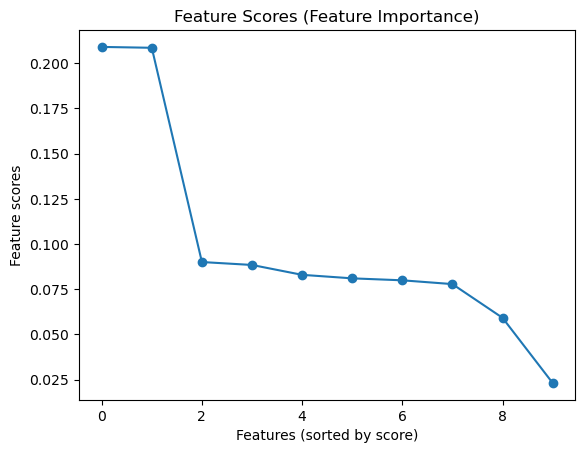

In [1674]:
# Sort the scores in descending order
sorted_scores = sorted(feat.feature_importances_, reverse=True)

# Plot the sorted scores
plt.plot(sorted_scores, marker='o')
plt.xlabel('Features (sorted by score)')
plt.ylabel('Feature scores')
plt.title('Feature Scores (Feature Importance)')
plt.show()

In [1675]:
from sklearn.ensemble import ExtraTreesClassifier

# Assuming you have split your data into X_train and y_train
etc = ExtraTreesClassifier(n_estimators=100)
feat = etc.fit(X_train, y_train.astype('int'))

# Get feature importances and sort them in descending order
feature_importances = feat.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]

# Select the top 4 to 6 features
selected_features_indices = sorted_indices[:8]  # Change 6 to the desired number of features

# Get the column names of the selected features
selected_features = df_outliers_rem.drop('churn', axis=1).columns[selected_features_indices]

print(f'Feature Importances: {feature_importances}')
print(f'Selected features: {selected_features}')


Feature Importances: [0.05958368 0.08046767 0.09060448 0.0257582  0.07957709 0.2029239
 0.08292456 0.07995827 0.0884863  0.20971585]
Selected features: Index(['customer_support_calls', 'weekly_mins_watched',
       'no_of_days_subscribed', 'videos_watched', 'minimum_daily_mins', 'age',
       'weekly_max_night_mins', 'mail_subscribed'],
      dtype='object')


In [1676]:
df_fi = pd.concat([df_outliers_rem[selected_features], df_outliers_rem['churn']], axis=1)
df_fi.head()

customer_support_calls  weekly_mins_watched  no_of_days_subscribed  \
0                     1.0               148.35                   62.0   
1                     2.0               294.45                  149.0   
2                     5.0                87.30                  126.0   
3                     3.0               321.30                  131.0   
4                     1.0               243.00                  191.0   

   videos_watched  minimum_daily_mins   age  weekly_max_night_mins  \
0             1.0                12.2  36.0                   82.0   
1             3.0                 7.7  39.0                   87.0   
2             1.0                11.9  65.0                   91.0   
3             4.0                 9.5  24.0                  102.0   
4             7.0                10.9  40.0                   83.0   

   mail_subscribed  churn  
0                0      0  
1                0      0  
2                0      1  
3                1      0  
4                0      0

### Base modelling

In [1678]:
list_of_df = dict({'SKB': df_skb, 'RFE': df_rfe, 'PCA': df_pca, 'FI': df_fi})

models = []

models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, df in list_of_df.items():
    print('Dataset from: ', name)
    for name, model in models:
      kfold = KFold(n_splits=10, random_state=7, shuffle=True)
      cv_results = cross_val_score(model, X, y.astype('int'), cv=kfold, scoring='accuracy')
      results.append(cv_results)
      names.append(name)
      print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    print('\n')


Dataset from:  SKB
LR: 0.872989 (0.021962)
LDA: 0.865491 (0.024273)
KNN: 0.860664 (0.018382)
DT: 0.877273 (0.021807)
NB: 0.856914 (0.030789)
SVM: 0.874058 (0.021193)


Dataset from:  RFE
LR: 0.872989 (0.021962)
LDA: 0.865491 (0.024273)
KNN: 0.860664 (0.018382)
DT: 0.868685 (0.016447)
NB: 0.856914 (0.030789)
SVM: 0.874058 (0.021193)


Dataset from:  PCA
LR: 0.872989 (0.021962)
LDA: 0.865491 (0.024273)
KNN: 0.860664 (0.018382)
DT: 0.876203 (0.023068)
NB: 0.856914 (0.030789)
SVM: 0.874058 (0.021193)


Dataset from:  FI
LR: 0.872989 (0.021962)
LDA: 0.865491 (0.024273)
KNN: 0.860664 (0.018382)
DT: 0.874064 (0.020785)
NB: 0.856914 (0.030789)
SVM: 0.874058 (0.021193)




<b>Observation:</b>

- The dataset from RFE produces the best base model with the Random Forest Classifier.

In [1679]:
final_df = df_rfe.copy()

X = final_df.drop('churn', axis=1)
y = final_df['churn'].astype('int')

In [1680]:
from sklearn.preprocessing import MinMaxScaler


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()), ('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler()), ('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledDT', Pipeline([('Scaler', MinMaxScaler()), ('DT', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler()), ('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler()), ('SVM', SVC(gamma='auto'))])))

results = []
names = []

for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ScaledLR: 0.874056 (0.019232)
ScaledLDA: 0.866026 (0.024344)
ScaledKNN: 0.890659 (0.019418)
ScaledDT: 0.875677 (0.014688)
ScaledNB: 0.856914 (0.030789)
ScaledSVM: 0.874058 (0.021193)


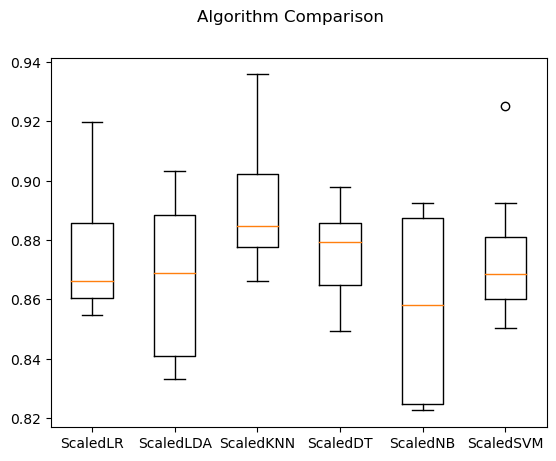

In [1681]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Ensemble Modelling

In [1682]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append((('GBM', GradientBoostingClassifier())))
ensembles.append((('RF', RandomForestClassifier(n_estimators=10))))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))

results = []
names = []

for name, model in ensembles:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.876195 (0.025103)
GBM: 0.923363 (0.012909)
RF: 0.917998 (0.013608)
ET: 0.905658 (0.014967)


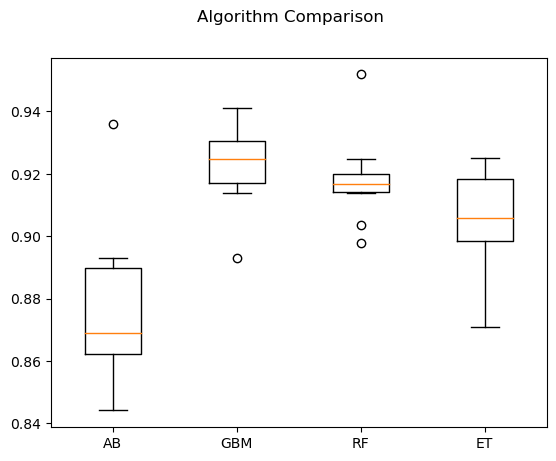

In [1683]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Hyperparameter Tuning Gradient Boosting Classifier

In [1686]:
# hyper param tuning for gradient boosting classifier

from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200, 300]
              , 'learning_rate': [0.001, 0.01, 0.1]
              , 'max_depth': [None, 5, 10]
              , 'min_samples_split': [2, 5, 10]
              , 'min_samples_leaf': [1, 2, 4]
              , 'max_features': ['sqrt', 'log2', None]
              , 'subsample': [0.5, 0.6, 0.7]}

model = GradientBoostingClassifier()

kfold = KFold(n_splits=10, random_state=7, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold, n_jobs=-1)
grid_result = grid.fit(X_train, y_train.astype('int'))
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, std, param in zip(means, stds, params):
    print('%f (%f) with: %r' % (mean, std, param))

Best: 0.963590 using {'learning_rate': 0.1, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}
0.920280 (0.016489) with: {'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.5}
0.928326 (0.013492) with: {'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.6}
0.932160 (0.012468) with: {'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.7}
0.927941 (0.017033) with: {'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.5}
0.931009 (0.015223) with: {'learning_rate': 0.001, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf

### Final Model

In [ ]:
{'learning_rate': 0.1, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300, 'subsample': 0.7}

In [1687]:
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

model = GradientBoostingClassifier(learning_rate=0.1, 
                               max_depth=10, 
                               max_features=None,
                               min_samples_leaf=4, 
                               min_samples_split=2, 
                               n_estimators=300,
                               subsample=0.7)

model.fit(rescaledX, y_train)

rescaledX_test = scaler.transform(X_test)

predictions = model.predict(rescaledX_test)

print('accuracy:', accuracy_score(y_test, predictions))
print('confusion matrix: \n', confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

accuracy: 0.9571209800918836
confusion matrix: 
 [[311  10]
 [ 18 314]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       321
           1       0.97      0.95      0.96       332

    accuracy                           0.96       653
   macro avg       0.96      0.96      0.96       653
weighted avg       0.96      0.96      0.96       653



### Area Under the Curve

AUC:  0.9902038058777164


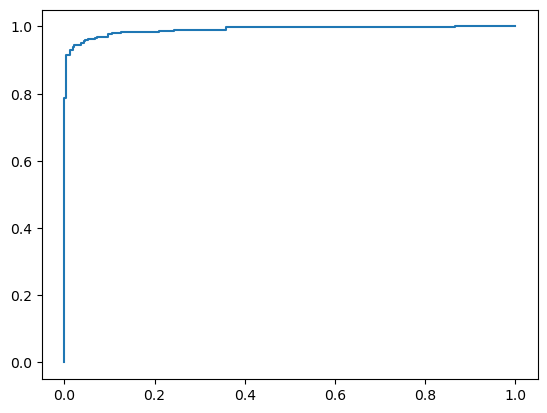

In [1688]:
y_pred_proba = model.predict_proba(rescaledX_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
print('AUC: ', auc)
plt.plot(fpr, tpr, label='Random Forest Classifier, auc=' + str(auc))
plt.show()

In [1689]:
## save the model and all that is needed to make predictions

import pickle

# save the model to disk
filename = 'finalized_churn_model.sav'
pickle.dump(model, open(filename, 'wb'))
